<a href="https://colab.research.google.com/github/lanyu0322/pedestrian_firstdraft_figures/blob/master/figure7_Heat_map_residents_and_working_people.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # -- mount google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# -- install geopandas
!pip install geopandas

     |████████████████████████████████| 931kB 7.9MB/s 
     |████████████████████████████████| 14.7MB 301kB/s 
     |████████████████████████████████| 10.9MB 39.5MB/s 


In [ ]:
import os
import time
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
# plt.rcParams["figure.dpi"] = 150

In [ ]:
# -- set the root directory for the project                                     
rpath = os.path.join("drive", "My Drive", "lwir")

In [ ]:
# -- important definition
def read_lehd():

    """ set the file names """
    lpath = os.path.join(rpath, "data", "lehd")
    wname = os.path.join(lpath, "ny_wac_S000_JT00_2017.csv") 
    rname = os.path.join(lpath, "ny_rac_S000_JT00_2017.csv")

    """ read in the data for NY state """
    print("READ_LEHD: loading the worker and resident totals for NY state...")
    wdata = pd.read_csv(wname)
    rdata = pd.read_csv(rname)

    """ rename the geocode for merging with the shape data """
    wdata.rename(columns = {'w_geocode': 'GEOID10'}, inplace=True)
    rdata.rename(columns = {'h_geocode': 'GEOID10'}, inplace=True)

    """ merge the worker and residents """
    cols = ["GEOID10", "C000"]
    lehd = pd.merge(wdata[cols], rdata[cols], on="GEOID10", 
                    suffixes=["_w", "_r"], how="outer").fillna(0)

    """ set the total number of workers and residents """
    lehd["total_p"] = lehd["C000_w"] + lehd["C000_r"]

    """ load the shapes """
    print("READ_LEHD: loading the census blocks for NY state...")
    t0      = time.time()
    cpath   = os.path.join("drive", "My Drive", "lwir", "data", "lehd", 
                           "tl_2019_36_tabblock10")
    cname   = os.path.join(cpath, "tl_2019_36_tabblock10.shp")
    bl_full = gp.read_file(cname)
    print("READ_LEHD:   elapsed time = {0}s" \
              .format(round(time.time() - t0), 2))

    """ convert the shape geo ID to integer """
    bl_full["GEOID10"] = bl_full["GEOID10"].astype(int)

    """ sub-select only New York City Counties """
    print("READ_LEHD: sub-selecting only Manhattan...")
    bl_mn = bl_full[bl_full["COUNTYFP10"] == "061"]

    """ merge LEHD data and geographic data """
    print("READ_LEHD: merging Manhattan census blocks with LODES...")
    lehd_bl = bl_mn.merge(lehd, on="GEOID10")

    return lehd_bl

In [ ]:
 # -- read in the LEHD data                                                      
try:
  lehd
except:
  lehd = read_lehd()

READ_LEHD: loading the worker and resident totals for NY state...
READ_LEHD: loading the census blocks for NY state...
READ_LEHD:   elapsed time = 29s
READ_LEHD: sub-selecting only Manhattan...
READ_LEHD: merging Manhattan census blocks with LODES...


In [ ]:
# -- read in the Manhattan boundaries                                           
bpath = os.path.join(rpath, "data", "boro_boundaries")
bname = "Borough Boundaries.geojson"
boro  = gp.read_file(os.path.join(bpath, bname))
boro  = boro[boro["boro_name"] == "Manhattan"]

In [ ]:
import math 


C000_r_log = []
C000_w_log = []

for i in range(len(lehd)):
  C000_r_log.append(math.log10(lehd.C000_r[i]+1))
  C000_w_log.append(math.log10(lehd.C000_w[i]+1))
  

In [ ]:
lehd['C000_r_log'] = C000_r_log
lehd['C000_w_log'] = C000_w_log

<Figure size 432x288 with 0 Axes>

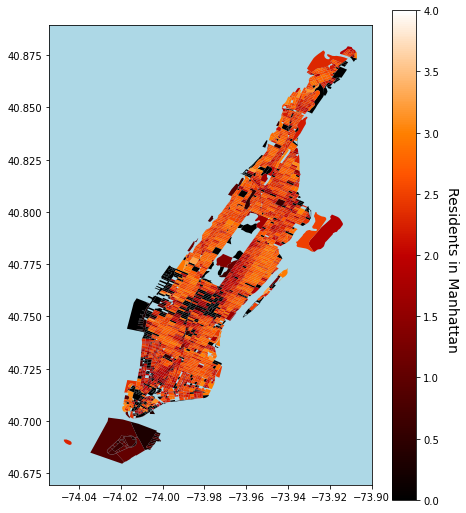

In [ ]:
#heat map
# -- plot it
fig = plt.figure()

# -- set the x and y ticks
xticks = np.arange(-74.04, -73.92, 0.04)
yticks = np.arange(40.675, 40.875, 0.025)

xticks=xticks
yticks=yticks
    # -- create the figure
fig, ax = plt.subplots(figsize=[8, 8])
fig.subplots_adjust(0.2, 0.1, 0.9, 0.95)
ax.set_facecolor("lightblue")
lehd.plot("C000_r_log", cmap="gist_heat", ax=ax, legend=True, vmin=0, vmax=4)
fig.text(0.9, 0.5, "Residents in Manhattan", ha="center", 
         va="center", rotation=-90, fontsize=14)

# -- save it 
outfile = os.path.join("drive", "My Drive", "lwir", "output", "figure7", "heat_map_residents.png")
fig.savefig(outfile)


<Figure size 432x288 with 0 Axes>

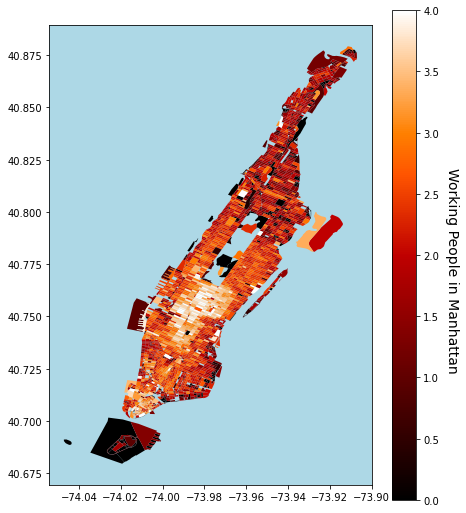

In [ ]:
#heat map
# -- plot it
fig = plt.figure()

# -- set the x and y ticks
xticks = np.arange(-74.04, -73.92, 0.04)
yticks = np.arange(40.675, 40.875, 0.025)

xticks=xticks
yticks=yticks
# -- create the figure
fig, ax = plt.subplots(figsize=[8, 8])
fig.subplots_adjust(0.2, 0.1, 0.9, 0.95)
ax.set_facecolor("lightblue")
lehd.plot("C000_w_log", cmap="gist_heat", ax=ax, legend=True, vmin=0, vmax=4)
fig.text(0.9, 0.5, "Working People in Manhattan", ha="center", 
         va="center", rotation=-90, fontsize=14)

# -- save it
outfile = os.path.join("drive", "My Drive", "lwir", "output", "figure7", "heat_map_working.png")
fig.savefig(outfile)
